Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9110 - loss: 0.2874 - val_accuracy: 0.9842 - val_loss: 0.0499
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9864 - loss: 0.0457 - val_accuracy: 0.9866 - val_loss: 0.0373
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9876 - val_loss: 0.0351
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9938 - loss: 0.0199 - val_accuracy: 0.9895 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9897 - val_loss: 0.0343
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0446
Test Accuracy: 0.9897000193595886


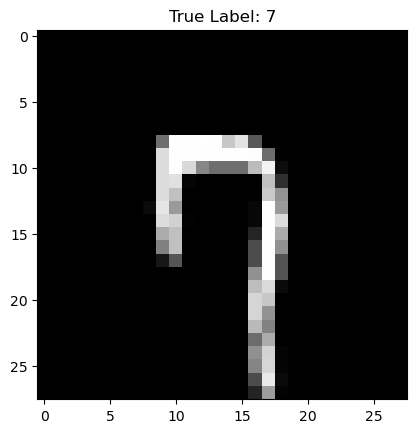

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Label: 7


In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values to 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build a simple CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Predict a random sample
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index], cmap='gray')
plt.title(f"True Label: {y_test[index]}")
plt.show()

prediction = np.argmax(model.predict(X_test[index].reshape(1, 28, 28, 1)))
print("Predicted Label:", prediction)